## PROYECTO ANALISIS DE DATOS

## Estudiante: Luisa Fernanda Anacona Taque

### Arboles de Decisión

In [112]:
# Importamos las librerías
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


### 1. Analisis exploratorio de Datos

In [5]:
#Cargamos el dataset
dataset = pd.read_csv("Titanic-Dataset.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#tamaño del dataset
dataset.shape


(891, 12)

In [9]:
#Eliminar una columna del dataset
data=dataset.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], axis=1)

In [11]:
#Comprobar si se elimino la columna
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [13]:
# Reemplazar 'Male' con un valor numérico específico, como 0
data= data.replace('male', 0)

In [19]:
# Reemplazar 'Female' con un valor numérico específico, como 1
data= data.replace('female', 1)

In [21]:
print (data)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0           0       3    0  22.0      1      0   7.2500
1           1       1    1  38.0      1      0  71.2833
2           1       3    1  26.0      0      0   7.9250
3           1       1    1  35.0      1      0  53.1000
4           0       3    0  35.0      0      0   8.0500
..        ...     ...  ...   ...    ...    ...      ...
886         0       2    0  27.0      0      0  13.0000
887         1       1    1  19.0      0      0  30.0000
888         0       3    1   NaN      1      2  23.4500
889         1       1    0  26.0      0      0  30.0000
890         0       3    0  32.0      0      0   7.7500

[891 rows x 7 columns]


In [23]:
#sacar datos estadisticos del dataset (media, desviación estándar,...)
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
#cantidad de valores nulos en el dataset
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [27]:
#eliminar las filas si se tuvieras valores nulos
data.dropna()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
889,1,1,0,26.0,0,0,30.0000


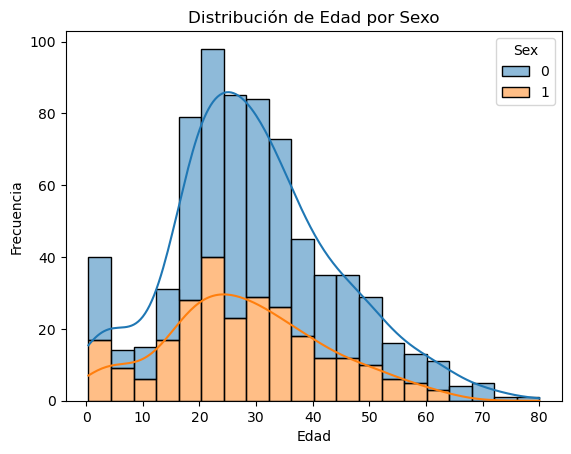

In [29]:
# Histograma de la edad, separado por sexo
sns.histplot(data=data, x='Age', hue='Sex', multiple='stack', kde=True)
plt.title('Distribución de Edad por Sexo')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

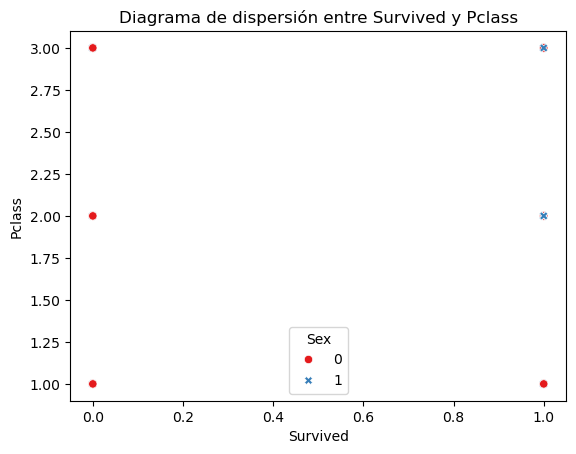

In [48]:
# Diagrama de dispersión 
sns.scatterplot(data=data, x='Survived', y='Pclass', hue='Sex', style='Sex', palette='Set1')

# Añadir etiquetas y título
plt.title('Diagrama de dispersión entre Survived y Pclass')
plt.xlabel('Survived')
plt.ylabel('Pclass')
plt.show()

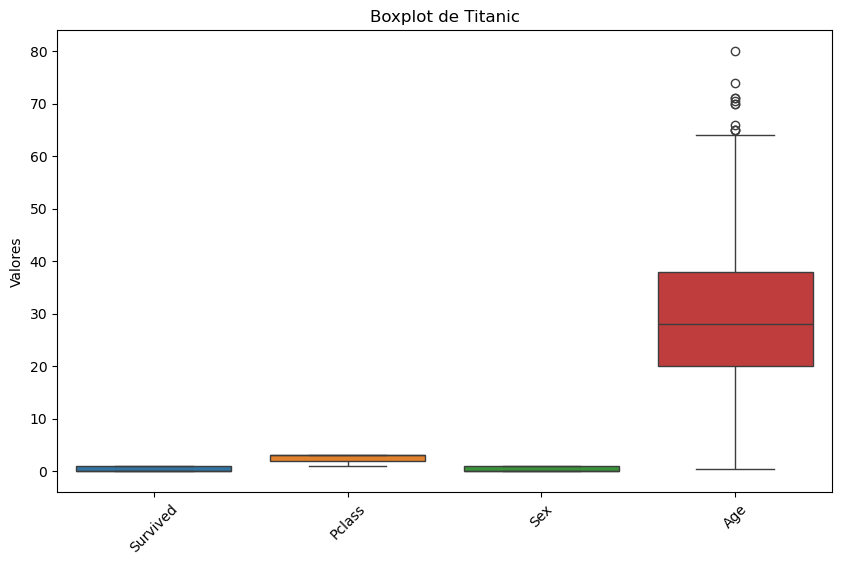

In [46]:
#Valores Atipicos
plt.figure(figsize=(10,6))
sns.boxplot(data=data[['Survived','Pclass','Sex','Age']])
plt.xticks(rotation=45)
plt.title('Boxplot de Titanic')
plt.ylabel('Valores')
plt.show()

In [291]:
#Correlación entre las variables
corr_matrix = data[['Survived', 'Pclass', 'Sex', 'Age']].corr()

In [295]:
# Mostrar la matriz de correlación
print(corr_matrix)

          Survived    Pclass       Sex       Age
Survived  1.000000 -0.338481  0.543351 -0.077221
Pclass   -0.338481  1.000000 -0.131900 -0.369226
Sex       0.543351 -0.131900  1.000000 -0.093254
Age      -0.077221 -0.369226 -0.093254  1.000000


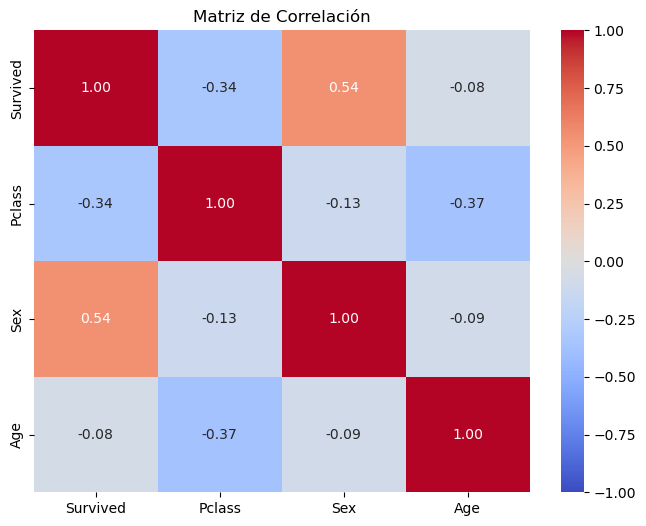

In [297]:
# Visualizar la matriz de correlación usando un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

In [262]:
X = data[['Pclass', 'Sex', 'Age']]  # Variables predictoras
y = data['Survived']  # Variable objetivo

# Dividir los datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [268]:
# Crear el clasificador de árbol de decisión
arbol = DecisionTreeClassifier(random_state=42)

In [270]:
# Entrenar el modelo con los datos de entrenamiento
arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [272]:
arbol.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.5, 0.75, 'x[0] <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 444\nvalue = [444, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 268\nvalue = [0, 268]'),
 Text(0.625, 0.5, '  False')]

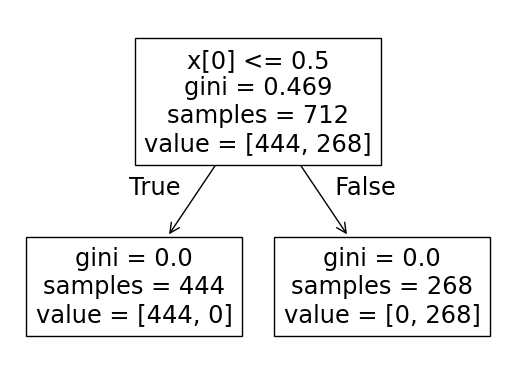

In [274]:
plot_tree(arbol)

In [278]:
# Realizar predicciones
predicciones = clf.predict(X_test)

In [283]:
from sklearn.metrics import accuracy_score, classification_report
# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 77.65%


In [285]:
# Reporte detallado de clasificación
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.68      0.71        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



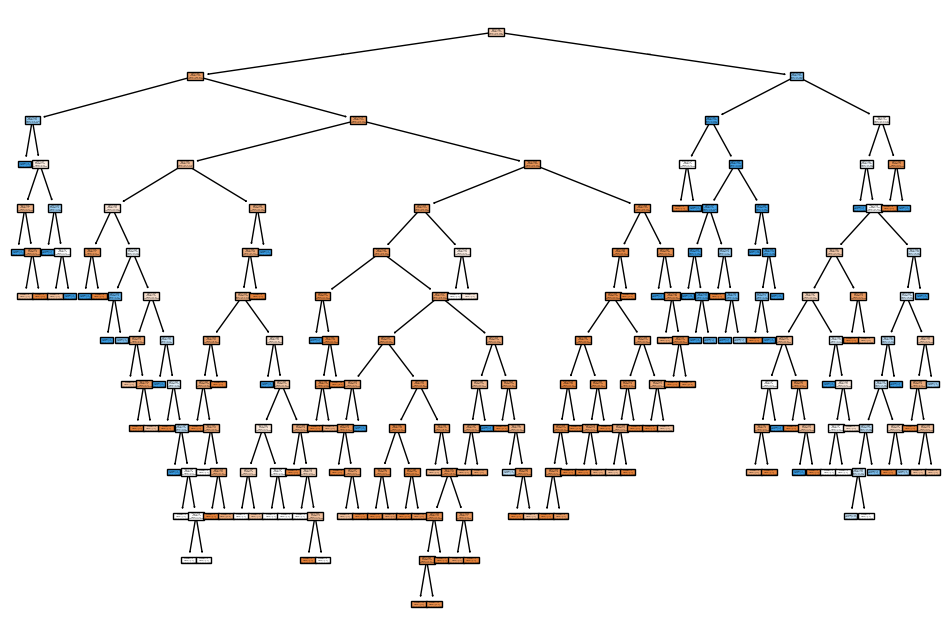

In [287]:
# Visualizar el arbol de decision
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=['Pclass', 'Sex', 'Age'], class_names=['Not Survived', 'Survived'])
plt.show()

In [289]:
#Realizar predicciones
# Supongamos que tienes un nuevo registro de entrada
nuevo_registro = pd.DataFrame({'Pclass': [1], 'Sex': [0], 'Age': [30]})

# Predecir si sobrevive o no
prediccion = clf.predict(nuevo_registro)
print('Sobrevivirá' if prediccion[0] == 1 else 'No sobrevivirá')


No sobrevivirá
